⏳ Fetching data via Engine...
Loading YoY Growth...
Loading Contribution...
Loading Returns...
Loading Managers...
✅ All data loaded successfully.
✅ Data fetched. Generating charts...

📸 Snapping Chart 1: YoY Growth...


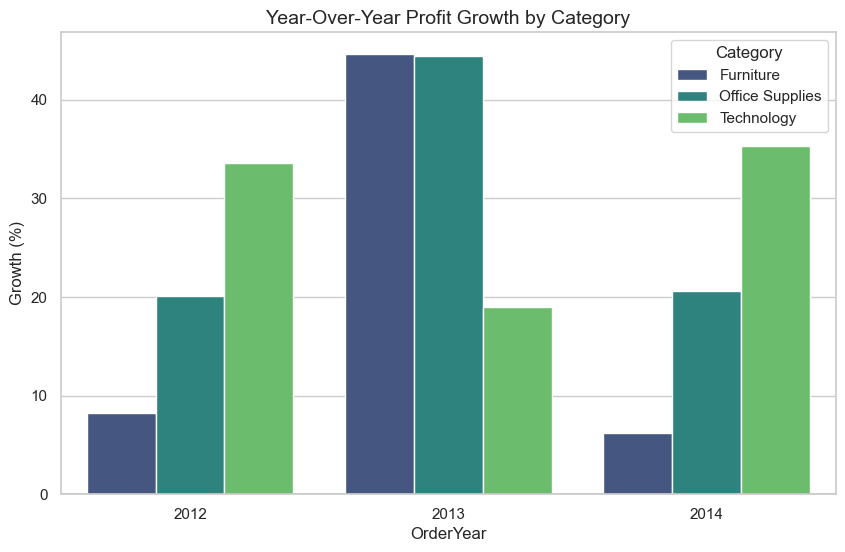

📸 Snapping Chart 2: Contribution...


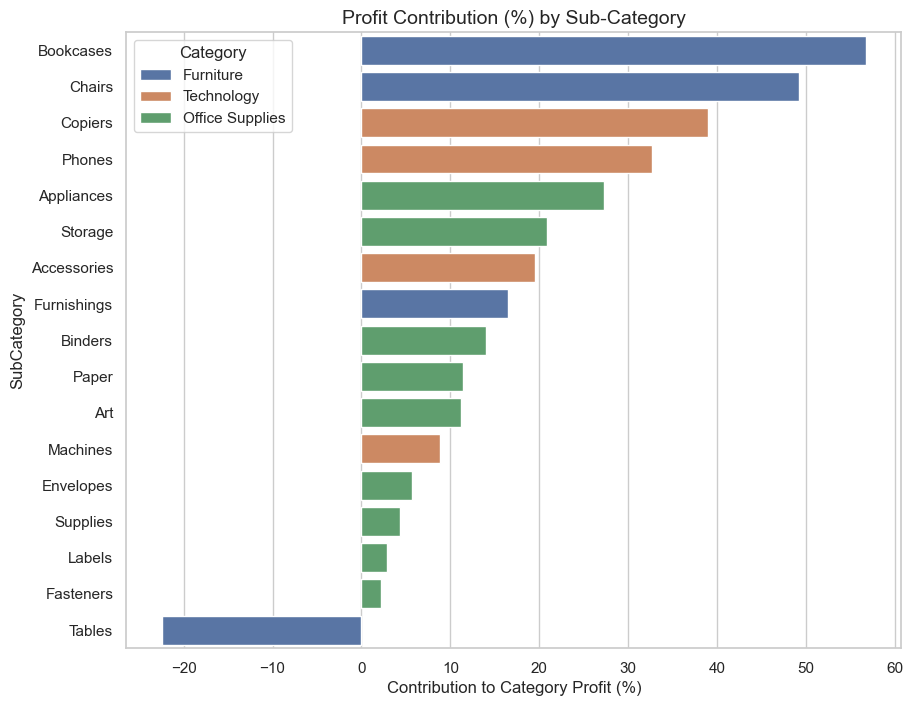

📸 Snapping Chart 3: Returns...


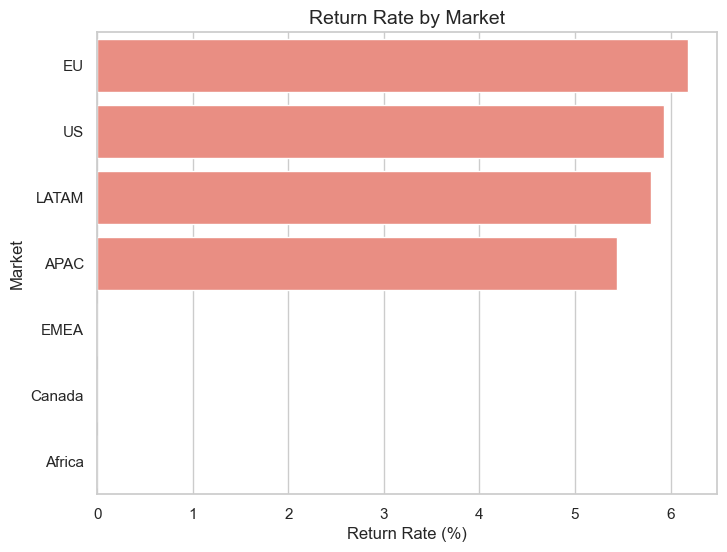


✅ All images saved to: c:\Projects\p2-global-sales-dashboard\reports\figures


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# 1. SETUP: Import our Backend Engine
sys.path.append(os.path.abspath('../src'))
import data_processing

# 2. CONFIGURATION: Professional Styling
sns.set_theme(style="whitegrid")
# Create a folder to save the images
img_dir = '../reports/figures'
os.makedirs(img_dir, exist_ok=True)

# 3. FETCH DATA (Using the Engine)
print("⏳ Fetching data via Engine...")
data = data_processing.get_data('../data/superstore.db')

if data:
    print("✅ Data fetched. Generating charts...\n")

    # --- CHART 1: YoY Growth (Line Chart) ---
    print("📸 Snapping Chart 1: YoY Growth...")
    plt.figure(figsize=(10, 6))
    
    # Filter out the first year (NaN) for cleaner chart
    df_growth = data['growth'].dropna()
    
    chart = sns.barplot(data=df_growth, x='OrderYear', y='YoY_Growth_Percent', hue='Category', palette='viridis')
    plt.title('Year-Over-Year Profit Growth by Category', fontsize=14)
    plt.ylabel('Growth (%)')
    plt.axhline(0, color='black', linewidth=1) # Add a zero line
    
    # Save the photo
    plt.savefig(f'{img_dir}/chart_1_growth.png', dpi=300, bbox_inches='tight')
    plt.show()

    # --- CHART 2: Contribution (Bar Chart) ---
    print("📸 Snapping Chart 2: Contribution...")
    plt.figure(figsize=(10, 8))
    
    # Sort for better visuals
    df_contrib = data['contribution'].sort_values('ContributionPercent', ascending=False)
    
    sns.barplot(data=df_contrib, x='ContributionPercent', y='SubCategory', hue='Category', dodge=False)
    plt.title('Profit Contribution (%) by Sub-Category', fontsize=14)
    plt.xlabel('Contribution to Category Profit (%)')
    
    plt.savefig(f'{img_dir}/chart_2_contribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # --- CHART 3: Returns (Bar Chart) ---
    print("📸 Snapping Chart 3: Returns...")
    plt.figure(figsize=(8, 6))
    
    sns.barplot(data=data['returns'], x='ReturnRate', y='Market', color='salmon')
    plt.title('Return Rate by Market', fontsize=14)
    plt.xlabel('Return Rate (%)')
    
    plt.savefig(f'{img_dir}/chart_3_returns.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n✅ All images saved to: {os.path.abspath(img_dir)}")

else:
    print("❌ Error: Could not fetch data.")